In [1]:
import pandas as pd
history= pd.read_csv('TCS_stock_history.csv')

In [32]:
action = pd.read_csv('TCS_stock_action.csv')
info= pd.read_csv('TCS_stock_info.csv')



In [33]:
info.isnull().sum()

zip        0
400001    42
dtype: int64

In [34]:

info= pd.read_csv('TCS_stock_info.csv', header=None, names=['field_name', 'value'])

# Check for null values
print(info['value'].isnull().sum())  # Count nulls
print(info[info['value'].isnull()])    # Show null rows

42
                       field_name value
53         annualHoldingsTurnover   NaN
55                      beta3Year   NaN
58          morningStarRiskRating   NaN
60         revenueQuarterlyGrowth   NaN
62              fundInceptionDate   NaN
63       annualReportExpenseRatio   NaN
64                    totalAssets   NaN
66                    sharesShort   NaN
67         sharesPercentSharesOut   NaN
68                     fundFamily   NaN
73              lastDividendValue   NaN
78                          yield   NaN
80                     shortRatio   NaN
81   sharesShortPreviousMonthDate   NaN
86         threeYearAverageReturn   NaN
87                  lastSplitDate   NaN
88                lastSplitFactor   NaN
89                      legalType   NaN
90               lastDividendDate   NaN
91       morningStarOverallRating   NaN
94              dateShortInterest   NaN
95                       pegRatio   NaN
96                      ytdReturn   NaN
98                    lastCapGain   N

In [14]:
import pandas as pd
df1= pd.read_csv("TCS_stock_info.csv")
df2 = pd.read_csv("TCS_stock_history.csv")
df3 = pd.read_csv("TCS_stock_action.csv")


In [4]:
import pandas as pd
df1= pd.read_csv('TCS_stock_info.csv', header=None, names=['field_name', 'value'])
df1.fillna("N/A", inplace=True)
df1.to_csv("TCS_stock_info_cleaned1.csv", index=False)


In [16]:
import numpy as np
df1['value'] = df1['value'].replace(['null'], np.nan)


In [17]:
print(df1['value'].isnull().sum())

42


In [18]:
df1.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2456\3373723494.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)


In [19]:
print(df1['value'].isnull().sum())

0


In [20]:
print(df3.isnull().sum())

Date            0
Dividends       0
Stock Splits    0
dtype: int64


In [21]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.sort_values(by='Date', inplace=True)
df2.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2456\282018163.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill', inplace=True)


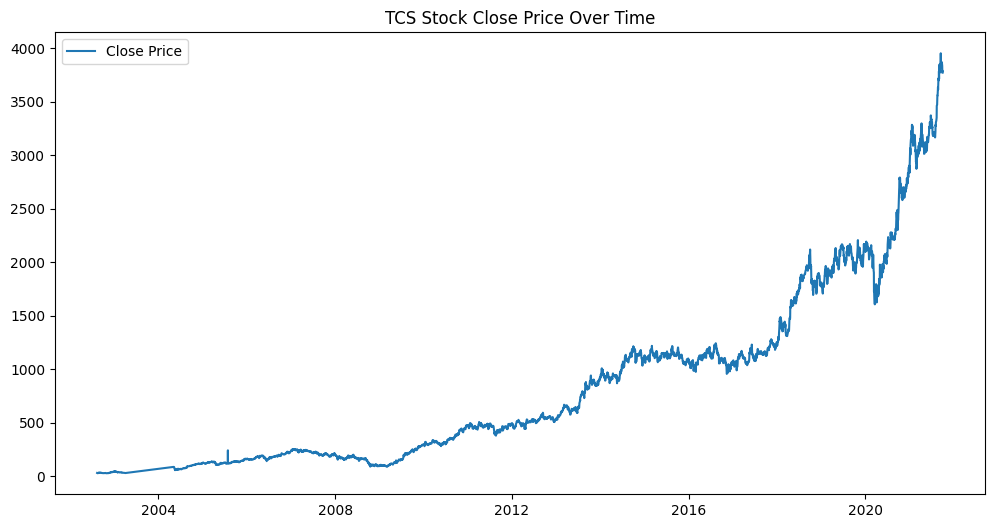

In [ ]:
# TCS stock price over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.plot(df2['Date'], df2['Close'], label='Close Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

# Moving Averages
df2['MA50'] = df2['Close'].rolling(window=50).mean()

In [23]:
df2['Year'] = df2['Date'].dt.year
df2['Prev_Close'] = df2['Close'].shift(1)
df2.dropna(inplace=True)

In [25]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df2[['Open', 'High', 'Low', 'Volume', 'Prev_Close']]
y = df2['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 46.23897967328628
R2 Score: 0.9999318361489477


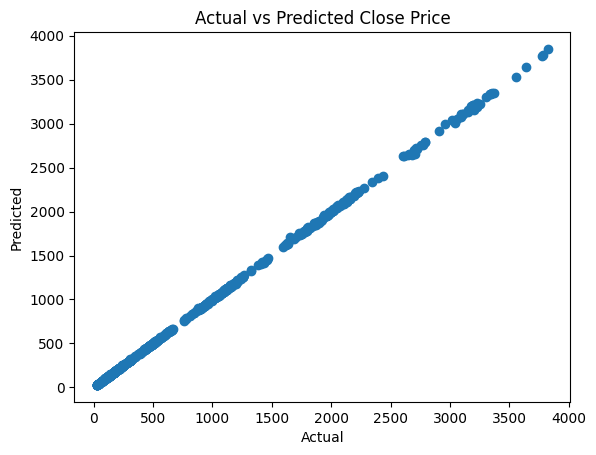

In [26]:
#Scatter plot: Predicted vs Actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Close Price")
plt.show()

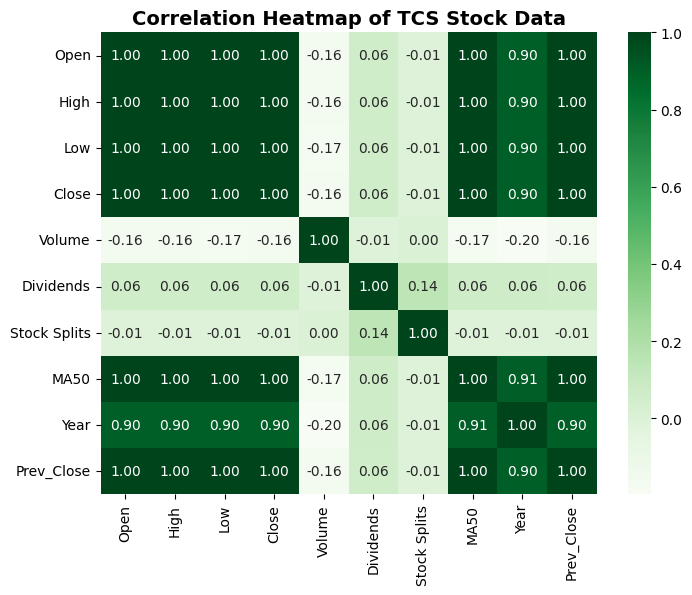


Correlation of features with Close Price:
Close           1.000000
High            0.999913
Low             0.999900
Open            0.999784
Prev_Close      0.999738
MA50            0.996965
Year            0.899253
Dividends       0.059689
Stock Splits   -0.006965
Volume         -0.163155
Name: Close, dtype: float64


In [ ]:
# Correlation of features with the target variable (Close Price)
import seaborn as sns

import matplotlib.pyplot as plt
# Calculate correlation matrix for numeric columns
corr_matrix = df2.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap of TCS Stock Data", fontsize=14, fontweight='bold')
plt.show()

# Display correlation of each feature with Close Price
correlation_with_close = corr_matrix['Close'].sort_values(ascending=False)
print("\nCorrelation of features with Close Price:")
print(correlation_with_close)


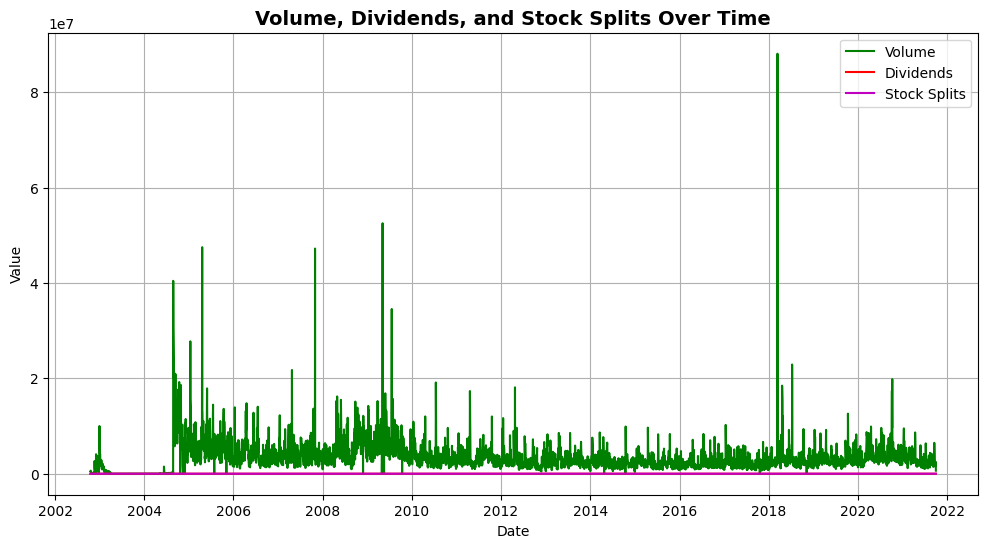

In [35]:
##volume divident and stock spilt over time
# Convert Date to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Sort by date
df2 = df2.sort_values(by='Date')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df2['Date'], df2['Volume'], label='Volume', color='g')
plt.plot(df2['Date'], df2['Dividends'], label='Dividends', color='r')
plt.plot(df2['Date'], df2['Stock Splits'], label='Stock Splits', color='m')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

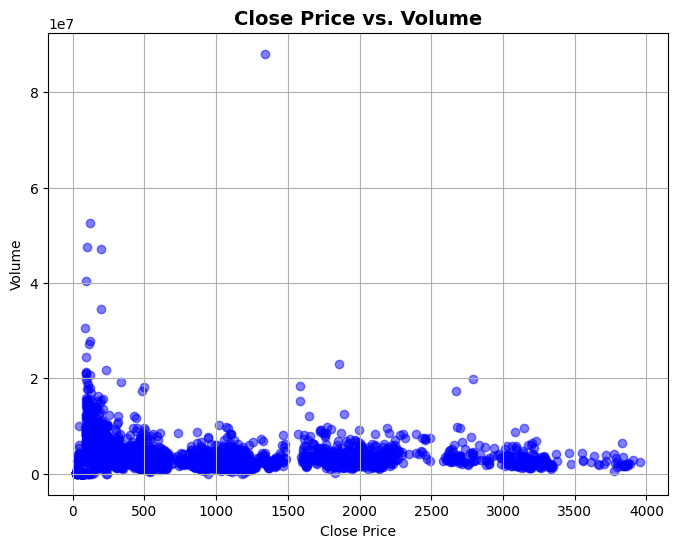

In [37]:
## close prive vs volume
# Scatter plot: Close Price vs Volume
plt.figure(figsize=(8,6))
plt.scatter(df2['Close'], df2['Volume'], alpha=0.5, color='blue')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

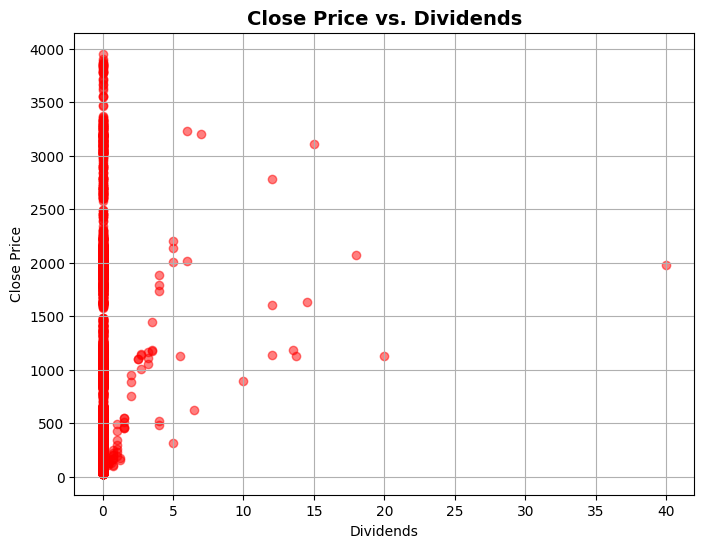

In [39]:
# Scatter plot: Close Price vs Dividends
plt.figure(figsize=(8,6))
plt.scatter(df2['Dividends'], df2['Close'], alpha=0.5, color='red')
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Close Price vs. Dividends', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

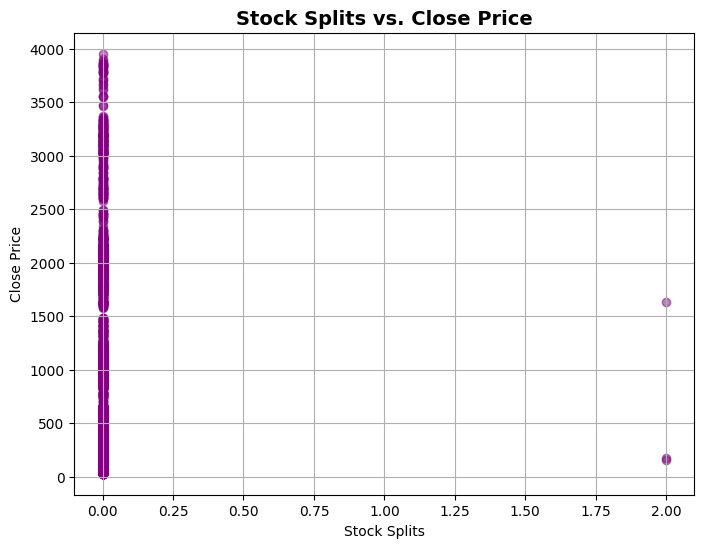

In [40]:
## stock spilt vs close price
# Scatter plot: Stock Splits vs Close Price
plt.figure(figsize=(8,6))
plt.scatter(df2['Stock Splits'], df2['Close'], alpha=0.5, color='purple')
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

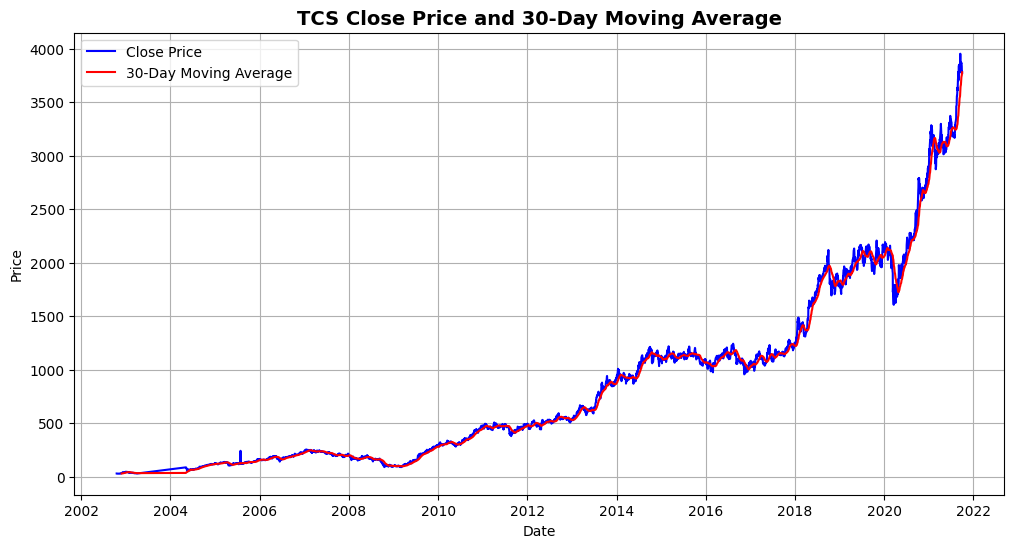

In [41]:
##close price and 30-Day moving average
#Calculate 30-day moving average
df2['30-Day MA'] = df2['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12,6))
plt.plot(df2['Date'], df2['Close'], label='Close Price', color='blue')
plt.plot(df2['Date'], df2['30-Day MA'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Close Price and 30-Day Moving Average', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


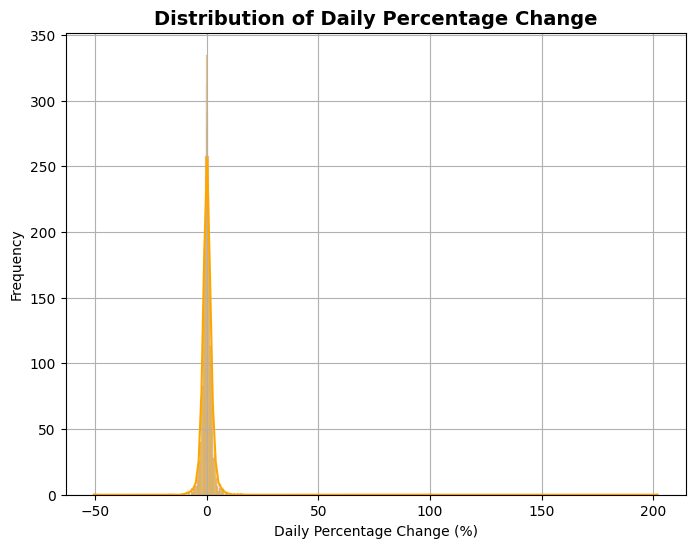

In [46]:
##distribution of daily percentage change
# Calculate daily percentage change
df2['Daily_Price_Change'] = df2['Close'].pct_change() * 100

# Plot distribution
plt.figure(figsize=(8,6))
sns.histplot(df2['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()